In [651]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [652]:
from setting import Setting
from protocols import aloha, slotted_aloha, csma, csma_cd

import matplotlib.pyplot as plt

In [653]:
st = Setting(host_num=3, total_time=100, packet_num=4, max_colision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=109550031)

In [654]:
print('aloha')
a_success, a_idle, a_collision = aloha(st, show_history=True)
print('success_rate: ' + str(a_success))
print('idle_rate: ' + str(a_idle))
print('collision_rate: ' + str(a_collision))

aloha
           V                                               V            V                     V         
h0: .......<--->...........................................<---|......<---|...................<---|.....
                              V                V                            V       V                   
h1: ..........................<---|................<---><---|.............<---|.................<---|...
                 V    V      V                                                           V              
h2: .............<---><--->..<---|.<--->.................................................<--->..........
success_rate: 0.3
idle_rate: 0.4
collision_rate: 0.3


In [655]:
print('slotted_aloha')
sa_success, sa_idle, sa_collision = slotted_aloha(st, show_history=True)
print('success_rate: ' + str(sa_success))
print('idle_rate: ' + str(sa_idle))
print('collision_rate: ' + str(sa_collision))

slotted_aloha
           V                                               V            V                     V         
h0: ..........<--->........................................<--->..........<--->...............<--->.....
                              V                V                            V       V                   
h1: ..............................<--->..........<--->.........................<---><--->...............
                 V    V      V                                                           V              
h2: ...............<---><---><--->.......................................................<--->..........
success_rate: 0.6
idle_rate: 0.4
collision_rate: 0.0


In [656]:
print('csma')
c_success, c_idle, c_collision = csma(st, show_history=True)
print('success_rate: ' + str(c_success))
print('idle_rate: ' + str(c_idle))
print('collision_rate: ' + str(c_collision))

csma
           V                                               V            V                     V         
h0: .......<--->...........................................<---|.................<---|..........<---><--
                              V                V                            V       V                   
h1: ..........................<---|.......................<---|...................<---|...<---|.........
                 V    V      V                                                           V              
h2: .............<---><--->..<---|...............<--->...................................<---|..........
success_rate: 0.25
idle_rate: 0.48
collision_rate: 0.27


In [657]:
print('csma_cd')
cd_success, cd_idle, cd_collision = csma_cd(st, show_history=True)
print('success_rate: ' + str(cd_success))
print('idle_rate: ' + str(cd_idle))
print('collision_rate: ' + str(cd_collision))

csma_cd
           V                                               V            V                     V         
h0: .......<--->...........................................<--->........<--->.....................<--|..
                              V                V                            V       V                   
h1: ..........................<|...............<---><--->..........................................<|...
                 V    V      V                                                           V              
h2: .............<---><--->..<--|......................................................<---><--->.......
success_rate: 0.45
idle_rate: 0.47
collision_rate: 0.08


Q1. Apply the following settings in all methods and plot the results.

In [658]:
host_num_list = [2,3,4,6]
packet_num_list = [1200,800,600,400]

aloha_success = []
slotted_success = []
csma_success = []
csmacd_success = []

for h, p in zip(host_num_list, packet_num_list):
    st = Setting(host_num=h, total_time=15000, packet_num=p, max_colision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=109550031)
    s, i, c = aloha(st, show_history=False)
    aloha_success.append(s)
    s, i, c = slotted_aloha(st, show_history=False)
    slotted_success.append(s)
    s, i, c = csma(st, show_history=False)
    csma_success.append(s)
    s, i, c = csma_cd(st, show_history=False)
    csmacd_success.append(s)

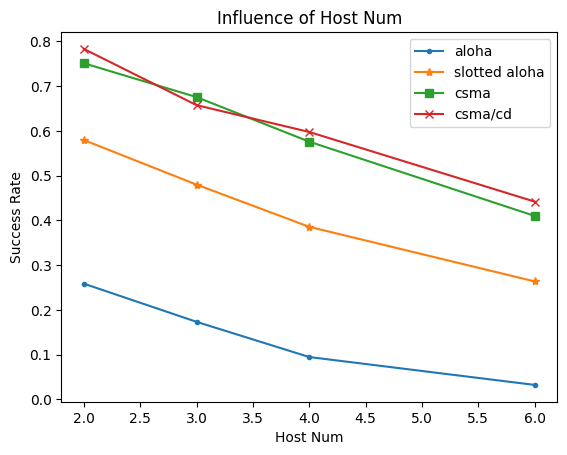

In [660]:
plt.plot(host_num_list, aloha_success, marker = '.', label='aloha')
plt.plot(host_num_list, slotted_success, marker = '*', label='slotted aloha')
plt.plot(host_num_list, csma_success, marker = 's', label='csma')
plt.plot(host_num_list, csmacd_success, marker = 'x', label='csma/cd')
plt.title("Influence of Host Num")
plt.xlabel("Host Num")
plt.ylabel("Success Rate")
plt.legend()
plt.show()

Q2. 

Q3. Redo the simulations from question 1 using the updated settings for all methods. Plot the results and describe the influence of using these expressions.